Testing diff evol algo with thresholding the weights

In [17]:
import sys
import glob
import numpy as np
import seaborn as sns


OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

Extra Helper Functions

In [19]:
def plot_ts(nodes, all_ts):


    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])

    plt.show()

Choosing which jobs to analyze

In [20]:
# CHANGE THIS CELL ACCORDING TO DATA YOU ARE ANALYZING
"""

"""
NTASKS =40
JOB= ['971019']
NUM_JOBS = len(JOB)

Loading all the data we need for analysis

In [21]:
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")
    if len(var) ==1:
        load_files[job] = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")[0]
        
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

Loaded vars files successfully 1


{'971019': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-20/971019/load_genvars_delays2.py'}

In [22]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm

all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*") #list of all results for a single job
    if len(full_list) == NTASKS:
        low = 1
        for res in full_list:
            start = res.index("_")+1
            end = res.index(".npy")
            if float(res[start:end])< low:
                low = float(res[start:end])
        print(i," Job: "+job+", lowest MSE: ", low)
        i = i+ 1
        final_res = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*"+str(low)+"*")[0]
        all_res[job]= np.load(final_res)
    else:
        print("Error", job)
        break

0  Job: 971019, lowest MSE:  0.030369896283498274


Plot of MEG time series of Target Data and Correlation Matrix

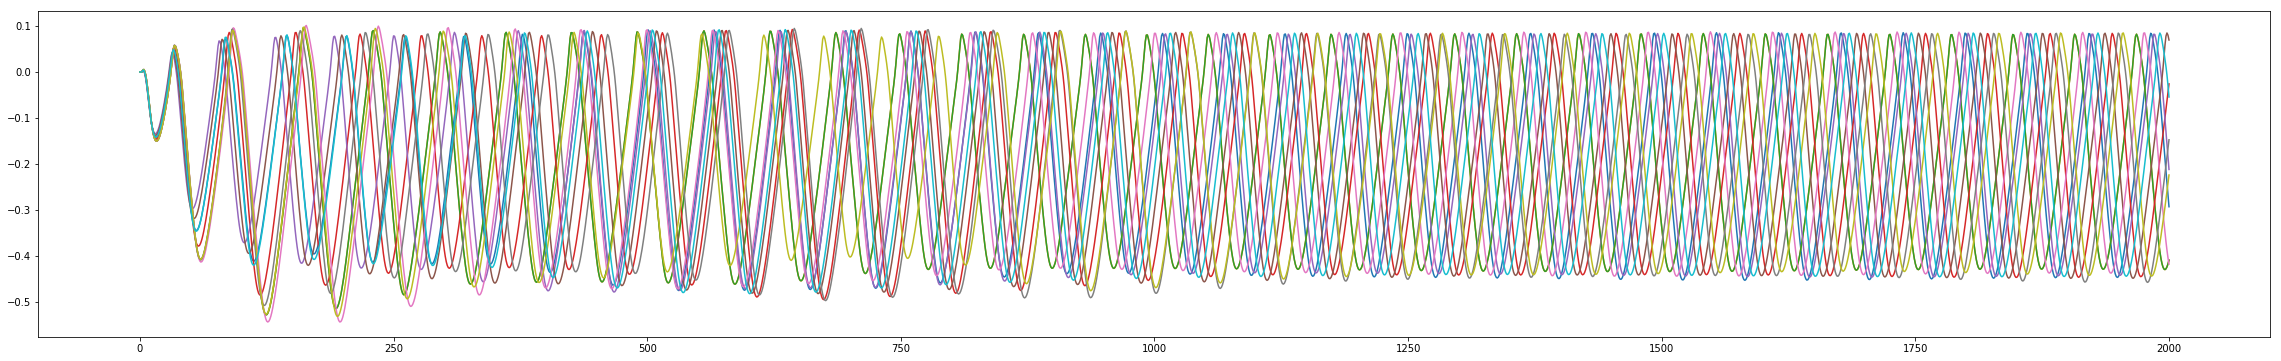

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

exec(open(load_files[JOB[0]]).read())
plot_ts(nodes, ue_array)

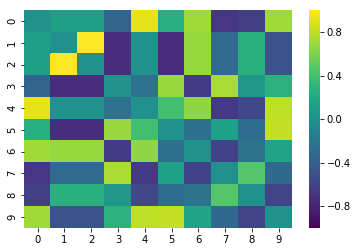

In [37]:
sns.heatmap(targ_data, vmax = 1, vmin = -1, cmap = "viridis")

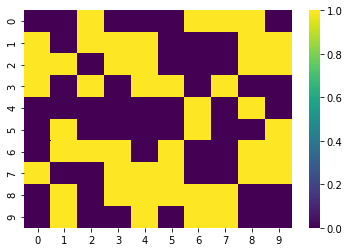

In [25]:
sns.heatmap(w_mat, vmax = 1, vmin = 0, cmap = "viridis")

In [28]:
w_mat

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.]])

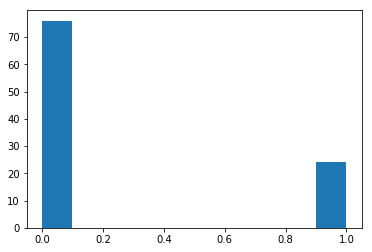

In [27]:
vals = np.triu(w_mat,1).ravel()
plt.hist(vals)
plt.show()

# STARTING ANALYSIS

Plotting all histograms of all the conduction vel / weights estimates

1 JOB #:  971019 min: 0.0 max: 1.0 avg: 0.4666666666666667


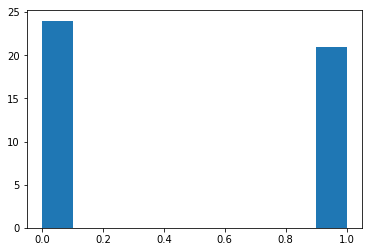

In [40]:
#plt.figure(figsize=(15.0,15.0))
for i in range(NUM_JOBS): 
    #plt.subplot(3, 3, i+1)


    print(i+1, "JOB #: ", JOB[i], "min: {} max: {} avg: {}".format(np.min(all_res[JOB[i]]), 
                                                                   np.max(all_res[JOB[i]]), np.average(all_res[JOB[i]])))
    val = all_res[JOB[i]]
    plt.hist(val, range= (0,1))
    #row major counting


In [ ]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure

top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

Looking at solution matrices

JOB #: 971019, max: 1.0 min: 0.0


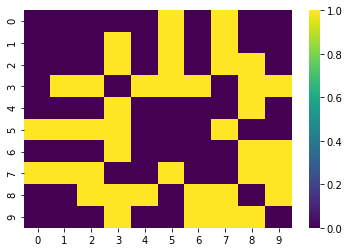

In [33]:
# ALL THE RESULTS AT ONCE

for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    ind = 0
    mat = np.ones((nodes, nodes))
    for row in range(0,nodes):
        for col in range(row+1, nodes):
            mat[row,col] = all_res[JOB[i]][ind]
            mat[col,row] = all_res[JOB[i]][ind]
            ind += 1
    np.fill_diagonal(mat,0)
    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(all_res[JOB[i]]), np.min(all_res[JOB[i]])))
    plt.figure()
    sns.heatmap(mat, vmax = 1, vmin = 0, cmap = "viridis")

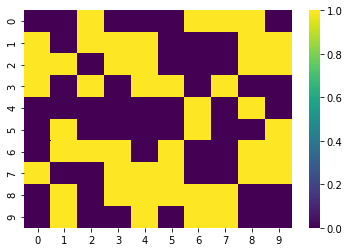

In [31]:
sns.heatmap(w_mat, vmax = 1, vmin = 0, cmap = "viridis")

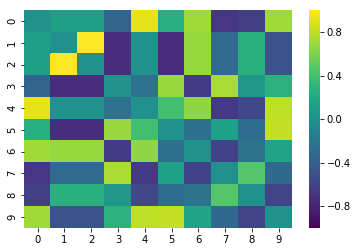

In [35]:
sns.heatmap(targ_data, vmax = 1, vmin =-1, cmap = "viridis")

In [ ]:
"""
    if plot == "corr":
        np.fill_diagonal(exp_data, 0)
        plot_mat(exp_data,"opt corr", 1, -1)
        print("MSE", res)
    if plot == "delay":
        plot_mat(delays,"Delays")
    if plot == "cw":
        if optim =="c":
            plot_mat(cmat, "opt c",  0.0005, 0)
        if optim =="w":
            plot_mat(wmat, "opt w", 0, 1)
"""
for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    
    if evol_params['optim'] =='w':
        MAT = c_mat
    elif evol_params['optim'] =='c':
        MAT = w_mat
    hf.residuals_cw_corr(all_res[JOB[i]], wc_params, targ_data, nodes, tract_mat, MAT, skip, 
                         wc_seed, evol_params['optim'],plot = "corr")

    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(all_res[JOB[i]]), np.min(all_res[JOB[i]])))

Conclusion: 

# TEST


In [3]:
import time
import helper_functions as hf
import differentialevolution_par_scinet_2 as df
import numpy as np


/gpfs/fs0/scratch/l/lfefebvr/noorir/model/helper_functions.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/traitlets/config/application.py", line 658, i

In [6]:
version_num = 7
c_mat = np.load("Anat Data/c_mat{}g.npy".format(version_num))
tract_mat = np.load("Anat Data/tract_mat{}g.npy".format(version_num))
w_mat = np.load("Anat Data/w_mat{}g.npy".format(version_num))
ue_array = np.load("Anat Data/ue_array{}g.npy".format(version_num))

#%% TARGET DATA 

nodes = 10
num_dim = int((((nodes**2)-nodes)/2))

skip = 200
targ_data = hf.plot_cor_mat(ue_array, nodes, skip)
np.fill_diagonal(targ_data, 0)
#%% DIFF EVOLUTION PARAMS

bounds = []
lower = 0
upper = 1
for n in range(num_dim):
    bounds.append((lower,upper))
    
evol_params= {
        'strategy': 'best2bin',
        'maxiter': 5,
        'popsize': 10,
        'tol': 0.5,
        'mut': int(1),
        'recomb': 0.7,
        'polish': False,
        'init': 'prior',
        'atol':0,
        'mse' : 0.005,
        'optim': 'w',
        'bounds': bounds,
        'heavi': False
        } #trying to optimize conduc velocity 'c' or weights 'w' or delays 'd'?

#%% WILSON-COWAN PARAMS 

"""Set seed for the wc_model_sim in the residuals fxn (so all potential 
solutions get tested with same noise variable)"""
wc_seed = 0

wc_params = {
        'c1': 1.6,
        'c2': -4.7,
        'c3': 3,
        'c4': -0.63,
        'I_e': 1.8,
        'I_i': -0.2,
        'g': 0.08,
        'time_steps': 2000,
        'dt': 0.01,
        'd': 0.001,
        'constant': True
        }
#%% ARGS FOR RESIDUAL FXN IN DIFF EVOLUTION ALROGITHM
"""residuals_cw_corr(c, params, nodes, targ_data, cw_mat, skip, seed, optim, tract_mat=None, heavyside =False,
                   plot = None):"""

if evol_params['optim'] =='w':
    MAT = c_mat
    args = (wc_params, nodes, targ_data, MAT, skip, wc_seed, evol_params['optim'], 
            tract_mat, evol_params['heavi'], None)

elif evol_params['optim'] =='c':
    MAT = w_mat
    args = (wc_params, nodes, targ_data, MAT, skip, wc_seed, evol_params['optim'], tract_mat, evol_params['heavi'], None)
    
elif evol_params['optim'] =='d':
    MAT = w_mat
    args = (wc_params, nodes, targ_data, MAT, skip, wc_seed, evol_params['optim'], None,
            evol_params['heavi'], None)

In [7]:
rng = np.random.RandomState(1)
#%% RUN OPTIMIZATION
"""residuals_cw_corr(c, params, nodes, targ_data, cw_mat, skip, seed, optim, tract_mat=None, heavyside =False,
                   plot = None):"""
prior = []
for p in range(evol_params['popsize']):
    mat = np.heaviside(rng.rand(nodes,nodes)-0.5,0)
    prior.append(hf.matrix2p(mat))
    
start_time = time.time()

res = df.differential_evolution(hf.residuals_cw_corr, args = args,
                              strategy = evol_params['strategy'],
                              popsize = evol_params['popsize'],
                              mutation = evol_params['mut'],
                              recombination = evol_params['recomb'],
                              bounds = evol_params['bounds'],
                              tol = evol_params['tol'],
                              maxiter = evol_params['maxiter'],
                              seed = rng,
                              disp = True,
                              polish = evol_params['polish'],
                              mse_thresh = evol_params['mse'],
                              atol = evol_params['atol'],
                              init = evol_params['init'],
                               prior =prior, scaleP = False)

elap = (time.time()- start_time)


init pop [[ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.
   1.  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.
   0.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.
   1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.
   1.  1.  1.  0.  1.  1.  0.  0.  1.]
 [ 1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  1.  0.  1.
   0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  1.
   1.  0.  1.  0.  0.  0.  0.  1.  1.]
 [ 1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.
   1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.
   0.  1.  1.  1.  1.  0.  1.  0.  1.]
 [ 1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.
   0.  0.  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.
   0.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1

looping through population members,  3 of  10
creating trial solution
mutating trial for binomial methods
performin crossovers in trial vector
param 2.0 limit  1.0
param -2.0 limit  0.0
param 2.0 limit  1.0
param 3.0 limit  1.0
param -2.0 limit  0.0
param 3.0 limit  1.0
param 2.0 limit  1.0
param -1.0 limit  0.0
param 2.0 limit  1.0
param -1.0 limit  0.0
param 2.0 limit  1.0
param -1.0 limit  0.0
param -2.0 limit  0.0
param -2.0 limit  0.0
param -2.0 limit  0.0
param 2.0 limit  1.0
param 2.0 limit  1.0
param 3.0 limit  1.0
param -2.0 limit  0.0
param -2.0 limit  0.0
param -1.0 limit  0.0
param 2.0 limit  1.0
param -1.0 limit  0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
he

looping through population members,  3 of  10
creating trial solution
mutating trial for binomial methods
performin crossovers in trial vector
param 2.0 limit  1.0
param -1.0 limit  0.0
param 2.0 limit  1.0
param -1.0 limit  0.0
param 2.0 limit  1.0
param 2.0 limit  1.0
param 2.0 limit  1.0
param 2.0 limit  1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
here
0
constant
looping through population members,  4 of  10
creating trial solution
mutating trial for binomial methods
performin crossovers in trial vector
param 2.0 limit  1.0
param -1.0 limit  0.0
param -1.0 limit  0.0
param 2.0 limit  1.0
param 2.0 limit  1.0
param 2.0 limit  1.0
param -1.0 limit  0.0
param 2.0 limit  1

looping through population members,  4 of  10
creating trial solution
mutating trial for binomial methods
performin crossovers in trial vector
param -1.0 limit  0.0
param 3.0 limit  1.0
param -2.0 limit  0.0
param -1.0 limit  0.0
param 2.0 limit  1.0
param 2.0 limit  1.0
param -1.0 limit  0.0
param 3.0 limit  1.0
param 2.0 limit  1.0
param -1.0 limit  0.0
param 2.0 limit  1.0
param -1.0 limit  0.0
param 2.0 limit  1.0
param 2.0 limit  1.0
param -1.0 limit  0.0
param -2.0 limit  0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
here
0
constant
looping through population members,  5 of  10
creating trial solution
mutating trial for binomial methods
performin crossovers in trial v

looping through population members,  5 of  10
creating trial solution
mutating trial for binomial methods
performin crossovers in trial vector
param -1.0 limit  0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
here
0
constant
looping through population members,  6 of  10
creating trial solution
mutating trial for binomial methods
performin crossovers in trial vector
param -1.0 limit  0.0
param 3.0 limit  1.0
param -2.0 limit  0.0
param -1.0 limit  0.0
param -1.0 limit  0.0
param 2.0 limit  1.0
param -2.0 limit  0.0
param 2.0 limit  1.0
param 2.0 limit  1.0
param -1.0 limit  0.0
param -2.0 limit  0.0
param -1.0 limit  0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0


looping through population members,  7 of  10
creating trial solution
mutating trial for binomial methods
performin crossovers in trial vector
param -1.0 limit  0.0
param 2.0 limit  1.0
param -2.0 limit  0.0
param -1.0 limit  0.0
param 2.0 limit  1.0
param -1.0 limit  0.0
param -1.0 limit  0.0
param -1.0 limit  0.0
param -1.0 limit  0.0
param -1.0 limit  0.0
param 3.0 limit  1.0
param -1.0 limit  0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
here
0
constant
looping through population members,  8 of  10
creating trial solution
mutating trial for binomial methods
performin crossovers in trial vector
param -1.0 limit  0.0
param 2.0 limit  1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.